In [26]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.axes3d import get_test_data

import pandas as pd
import seaborn as sns 
import time

%run functions.ipynb

e.g.1 $f(x) = (x-2)^2$

In [11]:
theta, f_x = gradient_descent([4], 1/2, 0.001, 200) 

Text(0.5, 1.0, 'Batch Gradient Descent')

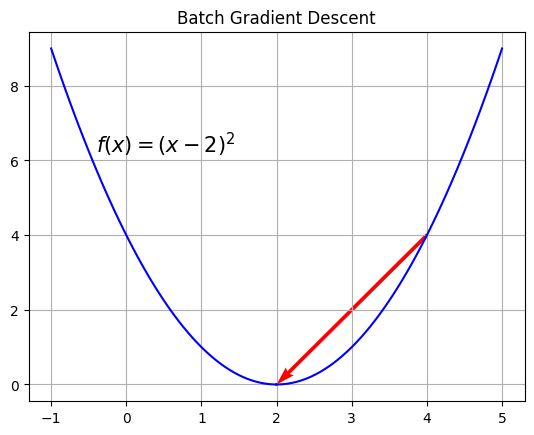

In [12]:
x = np.linspace(-1, 5, num=100)
plt.plot(x, (x-2)**2, c='b')
plt.text(-0.4, 6.2, '$f(x) = (x-2)^2$', fontsize=15)

plt.quiver(theta[:-1], f_x[:-1], theta[1:]-theta[:-1], f_x[1:]-f_x[:-1], scale_units='xy', angles='xy', color='r', scale=1)
plt.grid()
plt.title('Batch Gradient Descent')

e.g.2 $f(x,y) = x^2 + y^2$

In [41]:
theta_init = [-4,5] 
#theta_init = [3,2]
iter = 300

start = time.time()
theta, f_xy = gradient_descent(theta_init, 0.01, 0.01, iter)
end = time.time()
elapsed_time = np.round(end-start, 2)

d:\Temp\ipykernel_18976\572375277.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


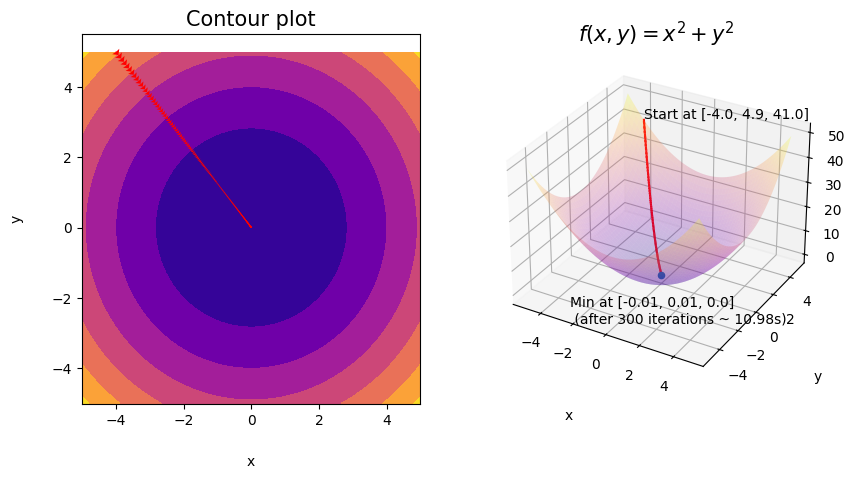

In [42]:
fig = plt.figure(figsize=plt.figaspect(0.5)) # Set up a figure twice as wide as it is tall

x = np.arange(-5, 5, 0.02)
y = np.arange(-5, 5, 0.02)
X, Y = np.meshgrid(x, y)

# Figure 1

ax1 = fig.add_subplot(1, 2, 1)
ax1.contourf(X, Y, X**2+Y**2, cmap = plt.cm.plasma)
ax1.set_title('Contour plot',fontsize=15)
ax1.set_xlabel('x', labelpad=20)
ax1.set_ylabel('y', labelpad=20)

plt.quiver(np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, theta.shape[1]-1, axis=1)[1,:], 
           np.delete(theta, [0], axis=1)[0,:]-np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, [0], axis=1)[1,:]-np.delete(theta, theta.shape[1]-1, axis=1)[1,:],  
           scale_units='xy', angles='xy', color='r', scale=1, headwidth=10)

# Figure 2

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, X**2+Y**2, cmap=plt.cm.plasma, alpha=0.25)
ax2.set_xlabel('x', labelpad=20)
ax2.set_ylabel('y', labelpad=20)
ax2.set_zlabel('z', labelpad=20)
ax2.set_title('$f(x, y) = x^2 + y^2$', fontsize=15)

ax2.quiver(np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, theta.shape[1]-1, axis=1)[1,:],
           f_xy[:-1],
           np.delete(theta, [0], axis=1)[0,:]-np.delete(theta, theta.shape[1]-1, axis=1)[0,:], 
           np.delete(theta, [0], axis=1)[1,:]-np.delete(theta, theta.shape[1]-1, axis=1)[1,:],  
           f_xy[1:]-f_xy[:-1],
           color='r')

ax2.scatter(theta[0, theta.shape[1]-1], theta[1, theta.shape[1]-1], f_xy[theta.shape[1]-1])
ax2.text(-1.7, -6.5, 0.5, "Min at [{}, {}, {}] \n (after {} iterations ~ {}s)".format(np.round(theta[0, theta.shape[1]-1],2), 
                                                                                     np.round(theta[1, theta.shape[1]-1],2), 
                                                                                     np.round(f_xy[theta.shape[1]-1],2), 
                                                                                     iter, 
                                                                                     elapsed_time), color='black')
ax2.text(theta_init[0], theta_init[1], feval('x**2+y**2', theta_init[0], theta_init[1]), "Start at [{}, {}, {}]".format(theta[0, 0], theta[1, 1], f_xy[0],2), color='black')

fig.show()